In [1]:
# importing necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# reading the data
df = pd.read_csv("svm_data.csv")

In [3]:
# displaying the top 5 rows of data
df.head()

,origin_temperature,destination_temperature,total_weather_delay
0,65.624,53.024,Extended Delay
1,33.566,1.616,Short Delay
2,65.624,53.024,Extended Delay
3,28.310,10.706,Extended Delay
4,65.624,53.024,Extended Delay


In [4]:
#creating training and testing dataset
X = df.drop(columns=['total_weather_delay']) 
y = df['total_weather_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
label = y_train.unique()
label

array(['Short Delay', 'Extended Delay'], dtype=object)

/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Extended Delay       0.54      1.00      0.70     22673
   Short Delay       0.00      0.00      0.00     19596

      accuracy                           0.54     42269
     macro avg       0.27      0.50      0.35     42269
  weighted avg       0.29      0.54      0.37     42269

Score 0.5363978329272043


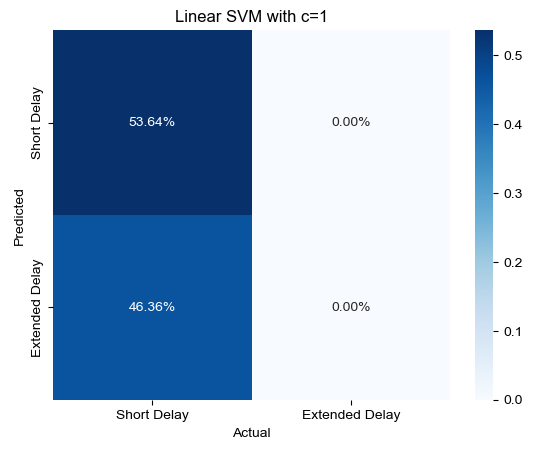

In [5]:
# linear svm model 1
scaler = StandardScaler()
linear_model1 = svm.LinearSVC(random_state=123,dual = True,max_iter=10000)
pipeline1 = make_pipeline(scaler, linear_model1)
pipeline1.fit(X_train, y_train)
y_pred = pipeline1.predict(X_test)
print(classification_report(y_test, y_pred))
lsvm_score = pipeline1.score(X_test,y_test)
print('Score', lsvm_score)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear SVM with c=1')
ax.xaxis.set_ticklabels(label);
ax.yaxis.set_ticklabels(label);
plt.show()

/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Extended Delay       0.54      1.00      0.70     22673
   Short Delay       0.00      0.00      0.00     19596

      accuracy                           0.54     42269
     macro avg       0.27      0.50      0.35     42269
  weighted avg       0.29      0.54      0.37     42269

Score 0.5363978329272043


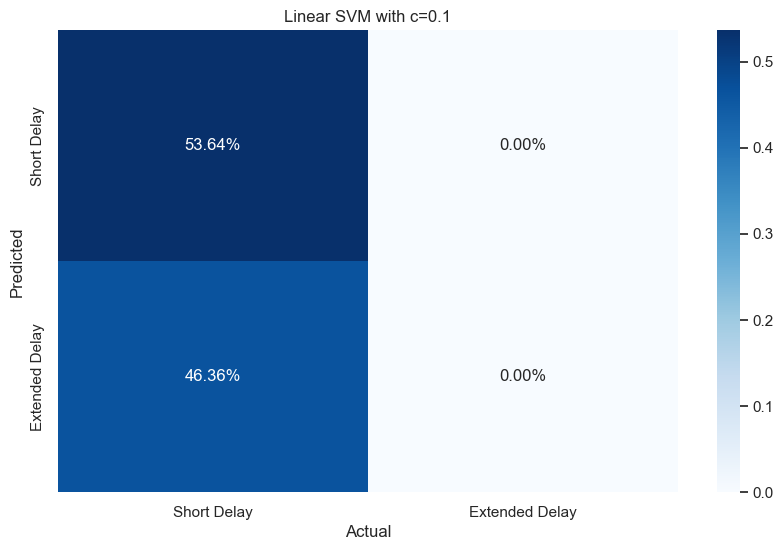

In [6]:
# linear svm model 2
scaler = StandardScaler()
linear_model2 = svm.LinearSVC(random_state=123,dual = True,max_iter=10000,C=0.1)
pipeline2 = make_pipeline(scaler, linear_model2)
pipeline2.fit(X_train, y_train)
y_pred = pipeline2.predict(X_test)
print(classification_report(y_test, y_pred))
lsvm_score = pipeline2.score(X_test,y_test)
print('Score', lsvm_score)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear SVM with c=0.1')
ax.xaxis.set_ticklabels(label);
ax.yaxis.set_ticklabels(label);
plt.show()

/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined 

                precision    recall  f1-score   support

Extended Delay       0.54      1.00      0.70     22673
   Short Delay       0.00      0.00      0.00     19596

      accuracy                           0.54     42269
     macro avg       0.27      0.50      0.35     42269
  weighted avg       0.29      0.54      0.37     42269

Score 0.5363978329272043


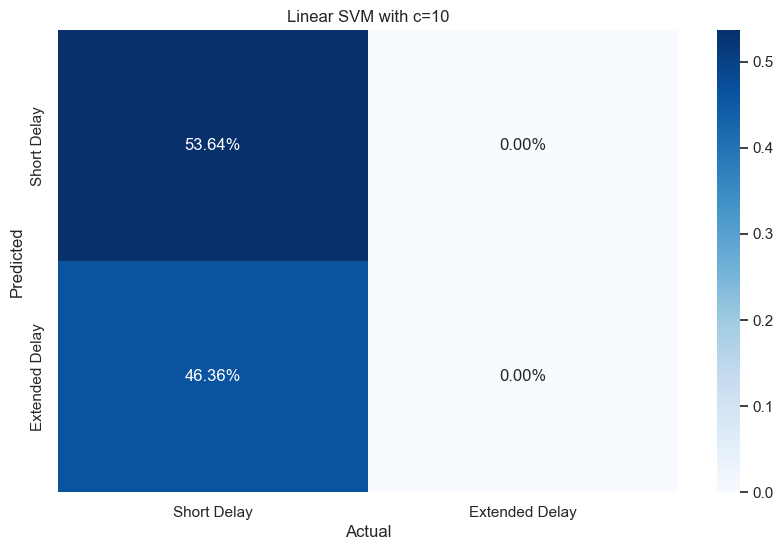

In [7]:
# linear svm model 3
scaler = StandardScaler()
linear_model3 = svm.LinearSVC(random_state=123,dual = True,max_iter=10000,C=10)
pipeline3 = make_pipeline(scaler, linear_model3)
pipeline3.fit(X_train, y_train)
y_pred = pipeline3.predict(X_test)
print(classification_report(y_test, y_pred))
lsvm_score = pipeline3.score(X_test,y_test)
print('Score', lsvm_score)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear SVM with c=10')
ax.xaxis.set_ticklabels(label);
ax.yaxis.set_ticklabels(label);
plt.show()

/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


                precision    recall  f1-score   support

Extended Delay       0.53      0.30      0.38     22673
   Short Delay       0.46      0.69      0.55     19596

      accuracy                           0.48     42269
     macro avg       0.49      0.49      0.47     42269
  weighted avg       0.49      0.48      0.46     42269

Score 0.4790508410418983


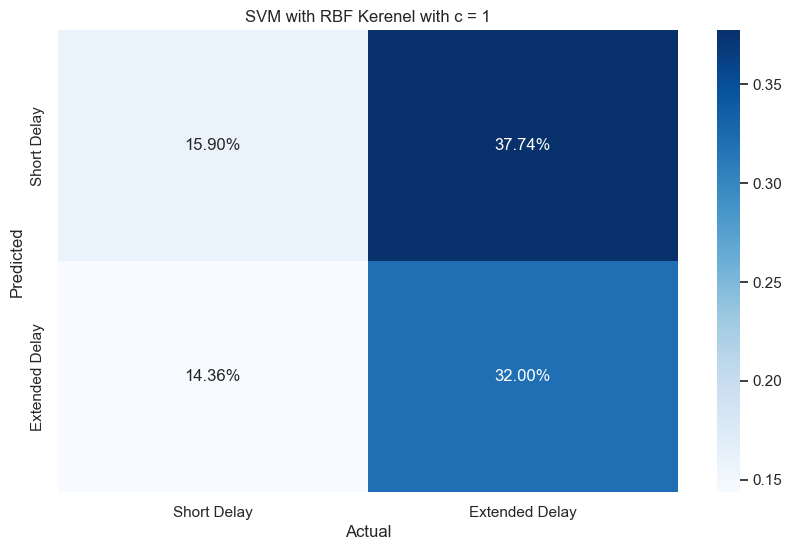

In [8]:
# rbf kernel svm model 1
scaler = StandardScaler()
rbf_model1 = svm.SVC(random_state=123,kernel="rbf",max_iter=10000)
pipeline4 = make_pipeline(scaler, rbf_model1)
pipeline4.fit(X_train, y_train)
y_pred = pipeline4.predict(X_test)
print(classification_report(y_test, y_pred))
rbf_score = pipeline4.score(X_test,y_test)
print('Score', rbf_score)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM with RBF Kerenel with c = 1')
ax.xaxis.set_ticklabels(label);
ax.yaxis.set_ticklabels(label);
plt.show()

/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


                precision    recall  f1-score   support

Extended Delay       0.54      0.16      0.24     22673
   Short Delay       0.46      0.85      0.60     19596

      accuracy                           0.48     42269
     macro avg       0.50      0.50      0.42     42269
  weighted avg       0.51      0.48      0.41     42269

Score 0.4770162530459675


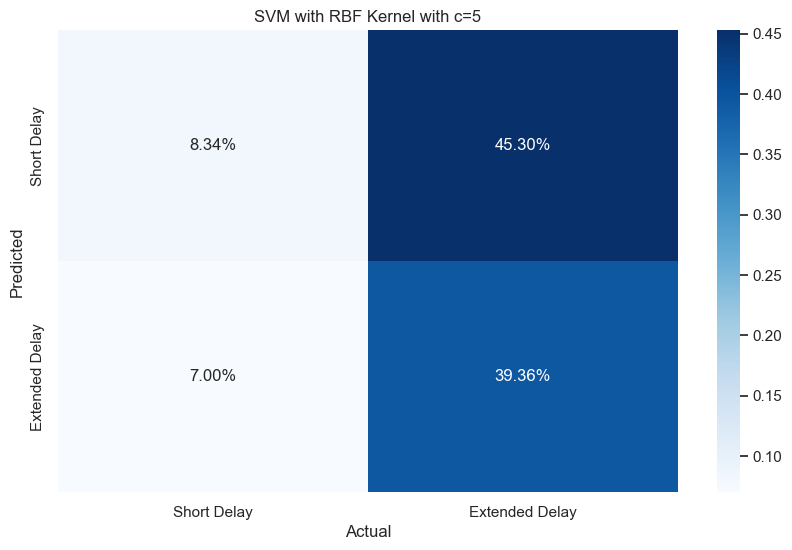

In [9]:
# rbf kernel svm model 2
scaler = StandardScaler()
rbf_model2 = svm.SVC(random_state=123,kernel="rbf",max_iter=10000,C=5)
pipeline5 = make_pipeline(scaler, rbf_model2)
pipeline5.fit(X_train, y_train)
y_pred = pipeline5.predict(X_test)
print(classification_report(y_test, y_pred))
rbf_score = pipeline5.score(X_test,y_test)
print('Score', rbf_score)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM with RBF Kernel with c=5')
ax.xaxis.set_ticklabels(label);
ax.yaxis.set_ticklabels(label);
plt.show()

/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


                precision    recall  f1-score   support

Extended Delay       0.53      0.42      0.47     22673
   Short Delay       0.46      0.57      0.51     19596

      accuracy                           0.49     42269
     macro avg       0.49      0.49      0.49     42269
  weighted avg       0.50      0.49      0.49     42269

Score 0.48884525302230947


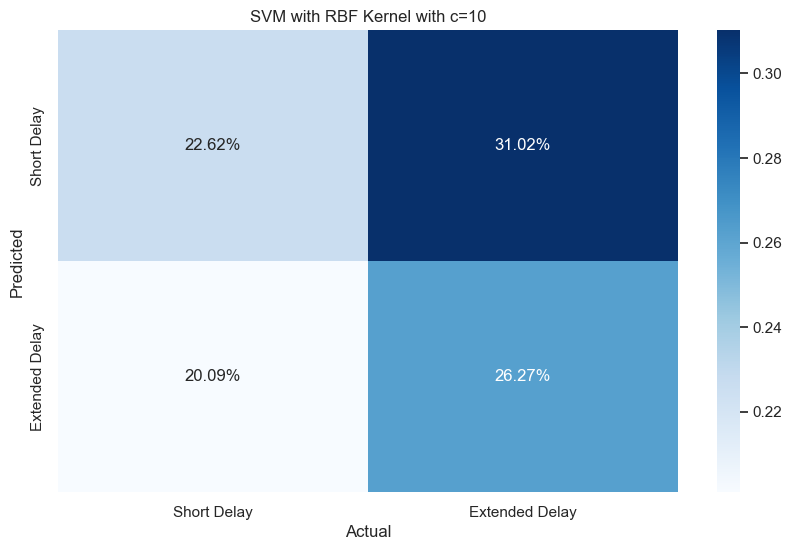

In [10]:
# rbf kernel svm model 3
scaler = StandardScaler()
rbf_model3 = svm.SVC(random_state=123,kernel="rbf",max_iter=10000,C=10)
pipeline6 = make_pipeline(scaler, rbf_model3)
pipeline6.fit(X_train, y_train)
y_pred = pipeline6.predict(X_test)
print(classification_report(y_test, y_pred))
rbf_score = pipeline6.score(X_test,y_test)
print('Score', rbf_score)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM with RBF Kernel with c=10')
ax.xaxis.set_ticklabels(label);
ax.yaxis.set_ticklabels(label);
plt.show()

/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


                precision    recall  f1-score   support

Extended Delay       0.53      0.02      0.03     22673
   Short Delay       0.46      0.98      0.63     19596

      accuracy                           0.46     42269
     macro avg       0.50      0.50      0.33     42269
  weighted avg       0.50      0.46      0.31     42269

Score 0.46452482907095033


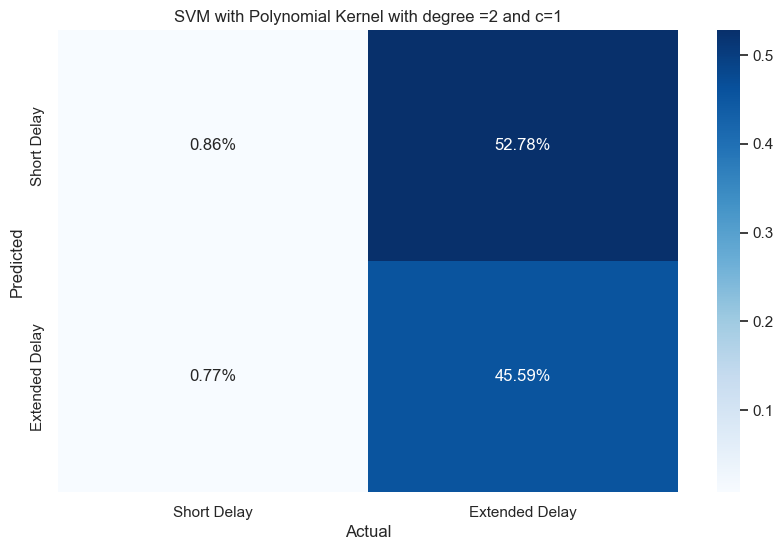

In [11]:
# poly kernel svm model 1
scaler = StandardScaler()
poly_model1 = svm.SVC(random_state=123,kernel="poly",degree=2,max_iter=10000)
pipeline7 = make_pipeline(scaler, poly_model1)
pipeline7.fit(X_train, y_train)
y_pred = pipeline7.predict(X_test)
print(classification_report(y_test, y_pred))
rbf_score = pipeline7.score(X_test,y_test)
print('Score', rbf_score)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM with Polynomial Kernel with degree =2 and c=1')
ax.xaxis.set_ticklabels(label);
ax.yaxis.set_ticklabels(label);
plt.show()

/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


                precision    recall  f1-score   support

Extended Delay       0.61      0.02      0.04     22673
   Short Delay       0.47      0.98      0.63     19596

      accuracy                           0.47     42269
     macro avg       0.54      0.50      0.34     42269
  weighted avg       0.54      0.47      0.32     42269

Score 0.4678606070642788


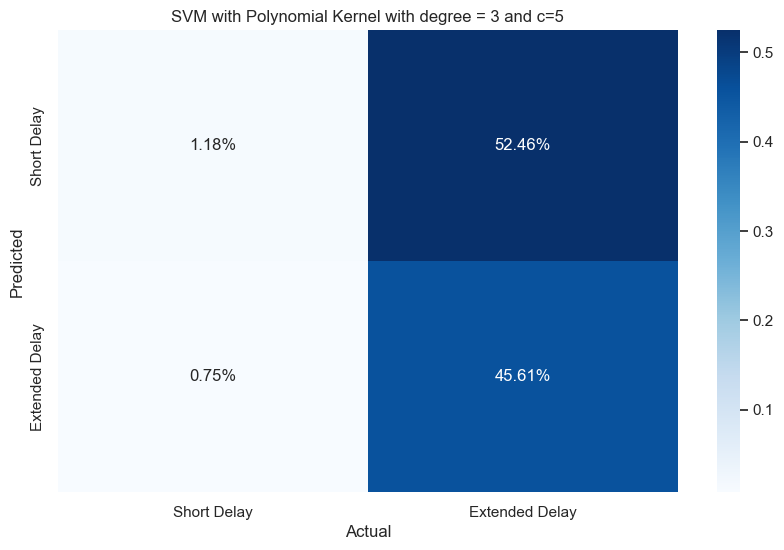

In [12]:
# poly kernel svm model 2
scaler = StandardScaler()
poly_model2 = svm.SVC(random_state=123,kernel="poly",degree=3,max_iter=10000,C=5)
pipeline8 = make_pipeline(scaler, poly_model2)
pipeline8.fit(X_train, y_train)
y_pred = pipeline8.predict(X_test)
print(classification_report(y_test, y_pred))
rbf_score = pipeline8.score(X_test,y_test)
print('Score', rbf_score)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM with Polynomial Kernel with degree = 3 and c=5')
ax.xaxis.set_ticklabels(label);
ax.yaxis.set_ticklabels(label);
plt.show()

/Users/hariharan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


                precision    recall  f1-score   support

Extended Delay       0.59      0.01      0.01     22673
   Short Delay       0.46      1.00      0.63     19596

      accuracy                           0.46     42269
     macro avg       0.53      0.50      0.32     42269
  weighted avg       0.53      0.46      0.30     42269

Score 0.4645721450708557


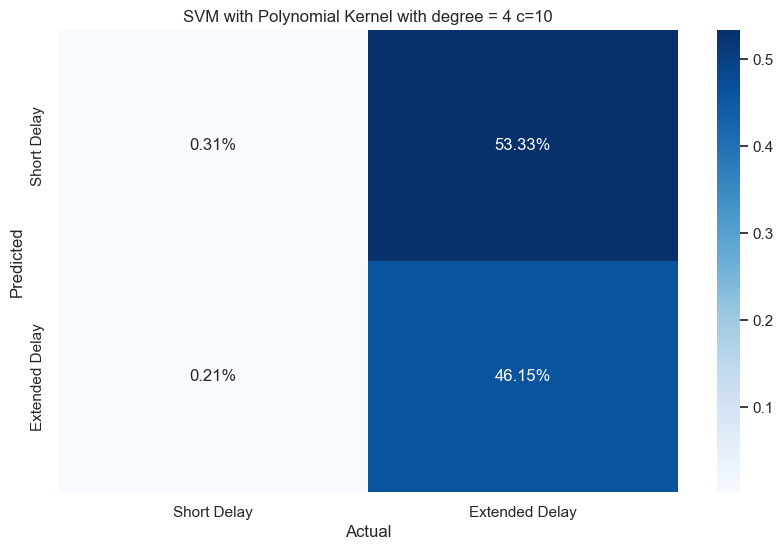

In [13]:
# poly kernel svm model 3
scaler = StandardScaler()
poly_model3 = svm.SVC(random_state=123,kernel="poly",degree=4,max_iter=10000,C=10)
pipeline9 = make_pipeline(scaler, poly_model3)
pipeline9.fit(X_train, y_train)
y_pred = pipeline9.predict(X_test)
print(classification_report(y_test, y_pred))
rbf_score = pipeline9.score(X_test,y_test)
print('Score', rbf_score)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM with Polynomial Kernel with degree = 4 c=10')
ax.xaxis.set_ticklabels(label);
ax.yaxis.set_ticklabels(label);
plt.show()

In [14]:
X_train.head()

,origin_temperature,destination_temperature
138001,56.408,92.084
59285,75.218,77.846
65006,37.796,23.990
75441,73.724,59.540
16630,77.558,73.256


In [15]:
X_test.head()

,origin_temperature,destination_temperature
90057,51.656,81.428
55001,79.646,79.808
83638,75.758,69.170
32082,72.896,12.884
35080,27.194,28.256


In [23]:
scaler.fit(X_train.to_numpy())
X_a = scaler.transform(X_train.to_numpy())
y
X = X_a
le = LabelEncoder()
y = le.fit_transform(y_train)
x = np.array([(i,j) for i,j in zip(X_train['origin_temperature'],X_train['destination_temperature'])])

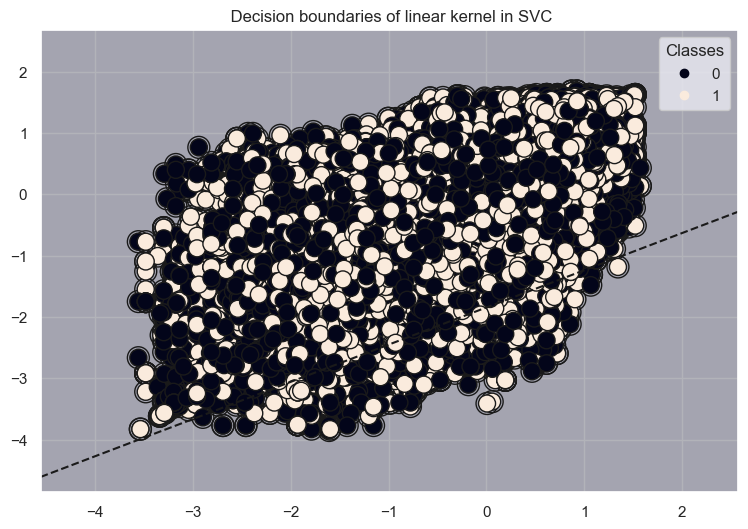

In [32]:
#plotting decision boundary
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

def plot_training_data_with_decision_boundary(kernel):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(9, 6))
    x_min, x_max = X_a[:, 0].min() - 1, X_a[:, 0].max() + 1
    y_min, y_max = X_a[:, 1].min() - 1, X_a[:, 1].max() + 1
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()
    
plot_training_data_with_decision_boundary("linear")

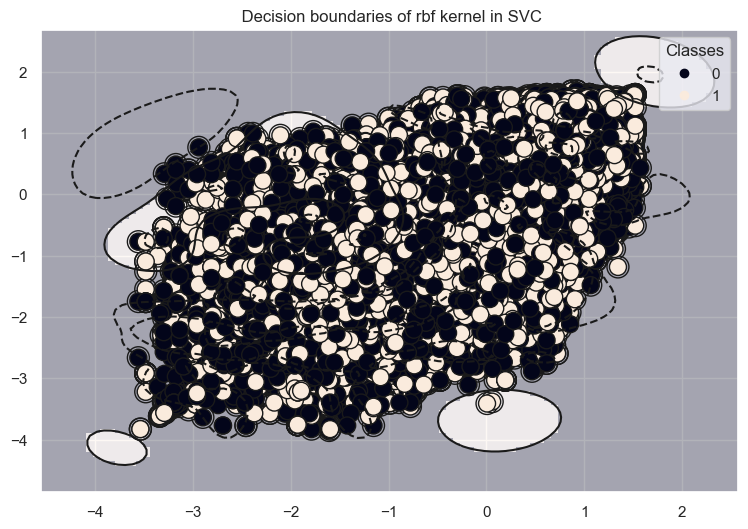

In [33]:
plot_training_data_with_decision_boundary("rbf")